Import Libraries

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from random import shuffle
from sklearn.model_selection import RandomizedSearchCV as RSCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Reading in Data

In [3]:
file_path = "data.csv"
df = pd.read_csv(file_path, index_col='year')

file_path = "tracks_features.csv"
df2 = pd.read_csv(file_path, index_col='year')

In [6]:
song_db=df.copy()
song_larger_db=df2.copy()

In [9]:
song_db.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,
1928,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790
1928,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767
1928,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800


In [10]:
song_larger_db.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
year,,,,,,,,,,,,,,,,,,,,,
1999,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999-11-02
1999,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999-11-02
1999,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999-11-02


In [6]:
song_db.shape


(169909, 18)

In [7]:
song_larger_db.shape

(1204025, 23)

Combining Databases

In [8]:
song_db.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [18]:
song_larger_db.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_date'],
      dtype='object')

In [7]:
song_db.drop(['artists','id', 'name', 'release_date', 'popularity' ], axis = 1, inplace = True)


In [5]:
song_larger_db.drop(['artists','id', 'name', 'release_date', 'album_id','artist_ids', 'time_signature', 'track_number', 'disc_number', 'album' ], axis = 1, inplace = True)


In [13]:
np.sort(song_db.columns)
np.sort(song_larger_db.columns)


array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'valence'], dtype=object)

In [12]:
np.sort(song_larger_db.columns) == np.sort(song_db.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [42]:
song_db_combined = pd.concat([song_db,song_larger_db])
song_db.shape

(1272462, 13)

In [12]:
song_db.columns[song_db.isnull().any()]

Index([], dtype='object')

In [13]:
song_db.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

Analysis

In [14]:
song_db.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,0.094058,116.948017,0.532095
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,0.149937,30.726937,0.262408
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,0.034900,93.516000,0.322000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,0.045000,114.778000,0.544000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,0.075400,135.712000,0.749000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.969000,244.091000,1.000000


Cleaning up Indexes - Only read from 1950 to 2019

In [15]:
np.sort(song_db.index.unique())

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

In [8]:
l_drop = np.arange(1921,1950)
l_drop = np.concatenate((l_drop,[ 2020]))
song_db.drop(labels=l_drop, inplace = True)

np.sort(song_db.index.unique())

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

Quantify Indices

In [9]:
enc = LabelEncoder()

In [10]:
labels = song_db.index
enc.fit(song_db.index.unique())

y = enc.transform(np.array(labels))
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


In [11]:
y_decade = y//10
Y_decade = np.unique(y_decade)
print(np.unique(Y_decade))

[0 1 2 3 4 5 6]


In [12]:
enc.fit(song_db['explicit'].unique())
song_db['explicit'] = enc.transform(song_db['explicit'])

In [13]:
song_db.set_index(y_decade, inplace=True)

In [24]:
song_db.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.782,0.633,106471,0.2610,1,0.0000,1,0.235,-16.389,1,0.7970,167.679,0.655
0,0.988,0.420,232933,0.0909,0,0.7860,10,0.104,-19.388,1,0.0409,123.089,0.227
0,0.993,0.394,177981,0.2580,0,0.0770,5,0.153,-9.779,0,0.1100,74.761,0.340
0,0.730,0.618,125300,0.2720,1,0.0000,6,0.146,-18.515,1,0.7310,67.141,0.449
0,0.993,0.475,188600,0.4070,0,0.0134,9,0.116,-13.011,1,0.0492,74.130,0.594


In [38]:
priors = song_db.index.value_counts().sort_index().to_numpy() /len(song_db.index)
print(priors)

[0.14265284 0.14301037 0.14301037 0.14301037 0.14301037 0.14301037
 0.14229532]


In [39]:
class_priors = np.diag(priors)
print(class_priors)

[[0.14265284 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.14301037 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.14301037 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.14301037 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.14301037 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.14301037
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.14229532]]


In [40]:
num_classes = len(Y_decade)

print(Y_decade)
print(num_classes)

[0 1 2 3 4 5 6]
7


In [13]:
N = len(df)
print('Labels:',Y_decade)
print('Total Datapoints:',N)
print("Counts Per Class:")
print(song_db.index.value_counts().sort_index())

Labels: [0 1 2 3 4 5 6]
Total Datapoints: 169909
Counts Per Class:
0    19950
1    20000
2    20000
3    20000
4    20000
5    20000
6    19900
dtype: int64


In [42]:
a=song_db[song_db.index==1]
a.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.621166,0.496651,2.101327e+05,0.415796,0.000600,0.154655,5.105650,0.209356,-12.737268,0.754150,0.058818,115.473647,0.556918
std,0.290340,0.154616,1.280126e+05,0.224759,0.024488,0.303644,3.464259,0.178263,4.975432,0.430601,0.086003,29.685197,0.259504
min,0.000000,0.000000,2.598700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415000,0.393000,1.477330e+05,0.239000,0.000000,0.000000,2.000000,0.100000,-15.274000,1.000000,0.032500,93.716500,0.352000
50%,0.702000,0.507000,1.740465e+05,0.398000,0.000000,0.000113,5.000000,0.137000,-11.957000,1.000000,0.038600,113.058000,0.572000
75%,0.858000,0.607000,2.251270e+05,0.574000,0.000000,0.057225,8.000000,0.261000,-9.276000,1.000000,0.051600,132.286750,0.774000
max,0.996000,0.944000,3.557955e+06,0.996000,1.000000,0.991000,11.000000,0.987000,1.812000,1.000000,0.966000,238.895000,0.991000


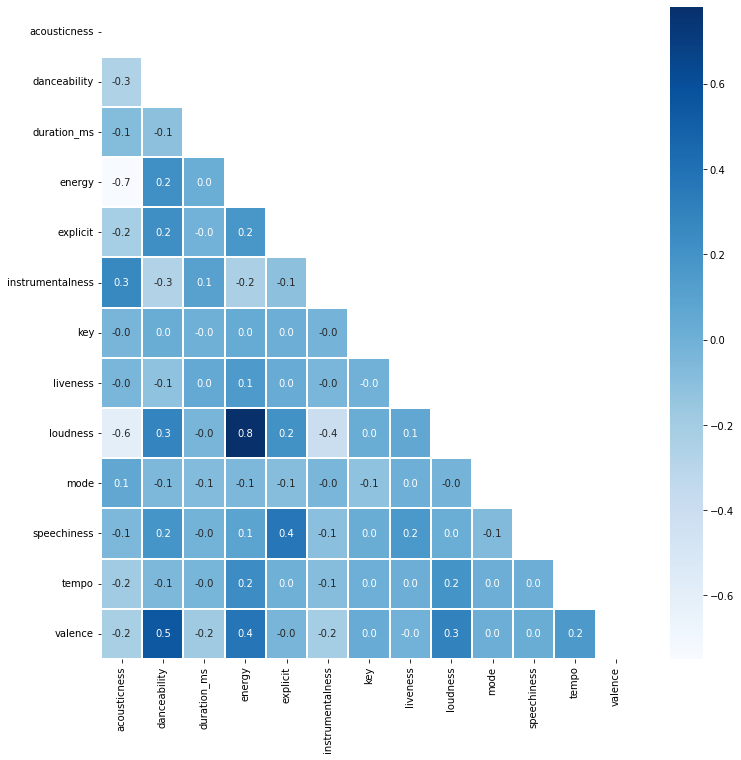

In [14]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_db.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_db.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

Variable Analysis

In [15]:
# https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice/notebook
def bar_plot(variable):
    
    var=song_db[variable]
    var_value= var.value_counts()
    print(var_value)
    print(var_value.shape)
    print(var_value.index.shape)
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))

0     17940
7     17339
2     15921
9     15156
5     13192
4     10928
1     10387
10     9495
11     8763
8      8527
6      6952
3      5250
Name: key, dtype: int64
(12,)
(12,)


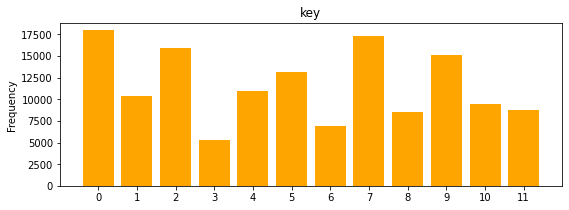

key:
0     17940
7     17339
2     15921
9     15156
5     13192
4     10928
1     10387
10     9495
11     8763
8      8527
6      6952
3      5250
Name: key, dtype: int64
1    99512
0    40338
Name: mode, dtype: int64
(2,)
(2,)


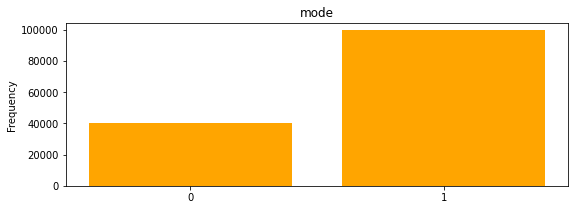

mode:
1    99512
0    40338
Name: mode, dtype: int64
0    128197
1     11653
Name: explicit, dtype: int64
(2,)
(2,)


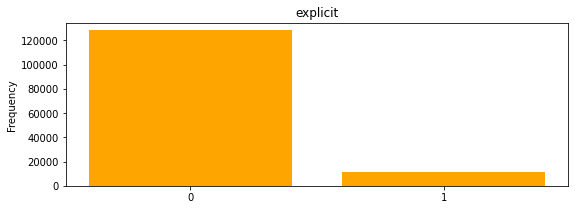

explicit:
0    128197
1     11653
Name: explicit, dtype: int64


In [16]:
category1 = ["key","mode","explicit"]
for c in category1:
    bar_plot(c)

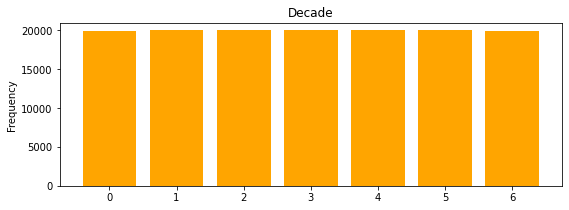

Decade:
1    20000
2    20000
3    20000
4    20000
5    20000
0    19950
6    19900
dtype: int64


In [46]:
var_value= song_db.index.value_counts()
var_labels= song_db.index.unique()

#visualize
plt.figure(figsize=(9,3))
plt.bar(var_value.index,var_value,color="orange")
plt.xticks(var_value.index,var_value.index.values)
plt.ylabel("Frequency")
plt.title("Decade")
plt.show()
print("{}:\n{}".format("Decade",var_value))

Basic Data Analysis

Models

In [20]:
covariance = song_db.std()
mean = song_db.mean()
X = (song_db-song_db.mean())/song_db.std()


Random Forest Classification with KFold

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import RFE
from sklearn import metrics 

estimators_range = range(20, 200, 20)

splits = 10
k = 0
k_fold = KFold(n_splits = splits, shuffle = True)



In [ ]:

clf = RandomForestClassifier(n_estimators = 100)

MSE_error = np.zeros(len(estimators_range))
optimal_models = []
for estimator_count_index in range(len(estimators_range)):
    
    clf = RandomForestClassifier(n_estimators = estimators_range[estimator_count_index])
    error = np.ones(splits)
    models = []
    k = 0
    for train_indices, valid_indices in k_fold.split(X):
        xTrain, xValid = X.values[train_indices], X.values[valid_indices]
        yTrain, yValid = y_decade[train_indices], y_decade[valid_indices]
        clf.fit(xTrain, yTrain)
        y_pred = clf.predict(xValid)
        error[k] = metrics.accuracy_score(yValid, y_pred)
        k += 1
    MSE_error[estimator_count_index] = np.mean(error)

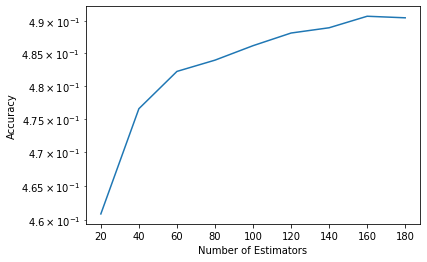

IndexError: range object index out of range

In [51]:
plt.semilogy(estimators_range, MSE_error[0:9])
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()
best_n_estimators = estimators_range[np.argmax(MSE_error)]
print(estimators_range[np.argmax(MSE_error)])

In [27]:
depth_range = range(5, 30, 5)


MSE_error_depth = np.zeros(len(depth_range))

for estimator_count_index in range(len(depth_range)):
    
    clf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = depth_range[estimator_count_index])
    error = np.ones(splits)
    k = 0
    for train_indices, valid_indices in k_fold.split(X):
        xTrain, xValid = X.values[train_indices], X.values[valid_indices]
        yTrain, yValid = y_decade[train_indices], y_decade[valid_indices]
        clf.fit(xTrain, yTrain)
        y_pred = clf.predict(xValid)
        error[k] = metrics.accuracy_score(yValid, y_pred)
        k += 1
    MSE_error_depth[estimator_count_index] = np.mean(error)


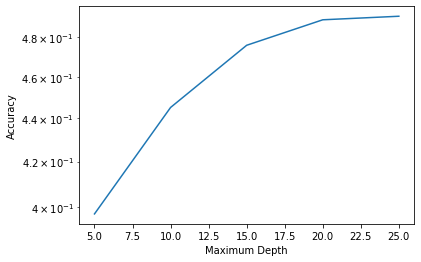

25


In [43]:
plt.semilogy(depth_range, MSE_error_depth)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()
best_depth = depth_range[np.argmax(MSE_error_depth)]
print(best_depth)

In [30]:
min_samples_leaf_range = range(1, 5, 1)


MSE_error_samples = np.zeros(len(min_samples_leaf_range))

for sample_count_index in range(len(min_samples_leaf_range)):
    
    clf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_depth, min_samples_leaf =  min_samples_leaf_range[sample_count_index])
    error = np.ones(splits)
    k = 0
    for train_indices, valid_indices in k_fold.split(X):
        xTrain, xValid = X.values[train_indices], X.values[valid_indices]
        yTrain, yValid = y_decade[train_indices], y_decade[valid_indices]
        clf.fit(xTrain, yTrain)
        y_pred = clf.predict(xValid)
        error[k] = metrics.accuracy_score(yValid, y_pred)
        k += 1
    MSE_error_samples[sample_count_index] = np.mean(error)


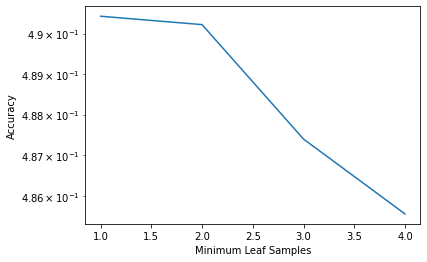

1


In [42]:
plt.semilogy(min_samples_leaf_range, MSE_error_samples)
plt.xlabel("Minimum Leaf Samples")
plt.ylabel("Accuracy")

plt.show()

best_samples = min_samples_leaf_range[np.argmax(MSE_error_samples)]
print(best_samples)

In [22]:
error = np.ones(splits)
k = 0

clf = RandomForestClassifier(n_estimators = 180, max_depth = 25, min_samples_leaf =  1)

for train_indices, valid_indices in k_fold.split(X):
    xTrain, xValid = X.values[train_indices], X.values[valid_indices]
    yTrain, yValid = y_decade[train_indices], y_decade[valid_indices]
    clf.fit(xTrain, yTrain)
    y_pred = clf.predict(xValid)
    error[k] = metrics.accuracy_score(yValid, y_pred)
    k += 1
Accuracy = np.mean(error)




0.4902895959957097


The estiamted accuracy of the model is:  0.4902895959957097


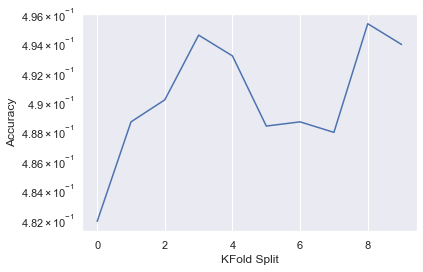

In [35]:
print("The estiamted accuracy of the model is: ", Accuracy)
plt.xlabel("KFold Split")
plt.ylabel("Accuracy")
plt.semilogy(range(0,10), error)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y_decade, test_size = 0.30)

In [29]:
true_clf = RandomForestClassifier(n_estimators = 180, max_depth = 25, min_samples_leaf =  1)

true_clf.fit(X_train, y_train)

y_predictions = true_clf.predict(X_test)





In [31]:
# metrics are used to find accuracy or error
conf_matrix = metrics.confusion_matrix(y_test, y_predictions)
print(conf_matrix)


[[4390 1146  250   62   35   35   48]
 [1519 3038  899  218  115  118  115]
 [ 574  955 2521 1024  417  321  153]
 [ 470  477 1026 2541  691  535  243]
 [ 465  528  761 1092 1729  999  520]
 [ 390  350  386  395  721 2417 1330]
 [ 262  206  228  132  354 1258 3496]]


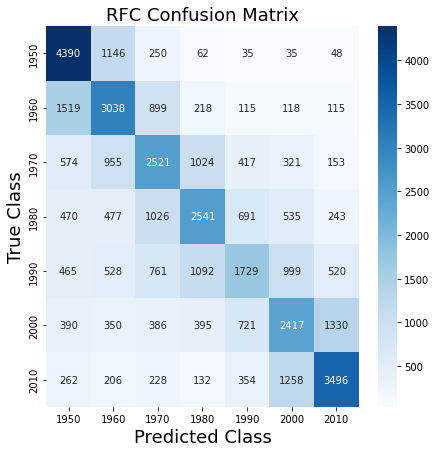

In [32]:
df_cm = pd.DataFrame(conf_matrix, index = [Y_decade[i]*10+1950 for i in Y_decade], columns = [Y_decade[i]*10+1950 for i in Y_decade])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('RFC Confusion Matrix', fontsize=18)
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()



In [41]:
print("Accuracy according to Train-Test Split: ", metrics.accuracy_score(y_test, y_predictions))

Accuracy according to Train-Test Split:  0.4798474556071982


In [33]:
recall = np.zeros(len(conf_matrix))     #across
precision = np.zeros(len(conf_matrix))  #down

for i in range(len(conf_matrix)):
    recall[i] = conf_matrix[i][i]/np.sum(conf_matrix[i])
    precision[i] = conf_matrix[i][i]/np.sum(conf_matrix[:,i])
print(recall)
print(precision)

[0.73583641 0.50448356 0.42263202 0.42470333 0.28372169 0.40357322
 0.58894879]
[0.54399009 0.45343284 0.41525284 0.46504392 0.42565239 0.42530354
 0.59204064]


[0.54399009 0.45343284 0.41525284 0.46504392 0.42565239 0.42530354
 0.59204064]
[0.73583641 0.50448356 0.42263202 0.42470333 0.28372169 0.40357322
 0.58894879]


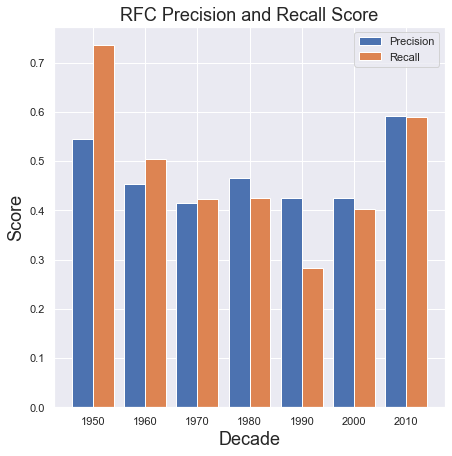

Recall  is how many of the true positives were recalled (found),
 i.e. how many of the correct hits were also found.
Precision is how many of the returned hits were true positive 
 i.e. how many of the found were correct hits.


In [34]:
prec = precision_score(y_test, y_predictions, average=None) #will return the precision scores for each class, while
rec = recall_score(y_test, y_predictions, average=None) #will return the total ratio of tp/(tp + fp)

print(prec)
print(rec)
sns.set()
plt.figure(figsize = (7,7))
plt.bar((Y_decade-.2)*10+1950, prec, width=4, label='Precision')
plt.bar((Y_decade+.2)*10+1950, rec, width=4, label='Recall')
plt.title('RFC Precision and Recall Score', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend()
plt.show()

print('Recall  is how many of the true positives were recalled (found),\n \
i.e. how many of the correct hits were also found.')
print('Precision is how many of the returned hits were true positive \n \
i.e. how many of the found were correct hits.')

[0.12691881 0.0859846  0.10215405 0.09597652 0.01561375 0.06780835
 0.04729413 0.07474696 0.12005132 0.01221017 0.08420376 0.07918325
 0.08785432]


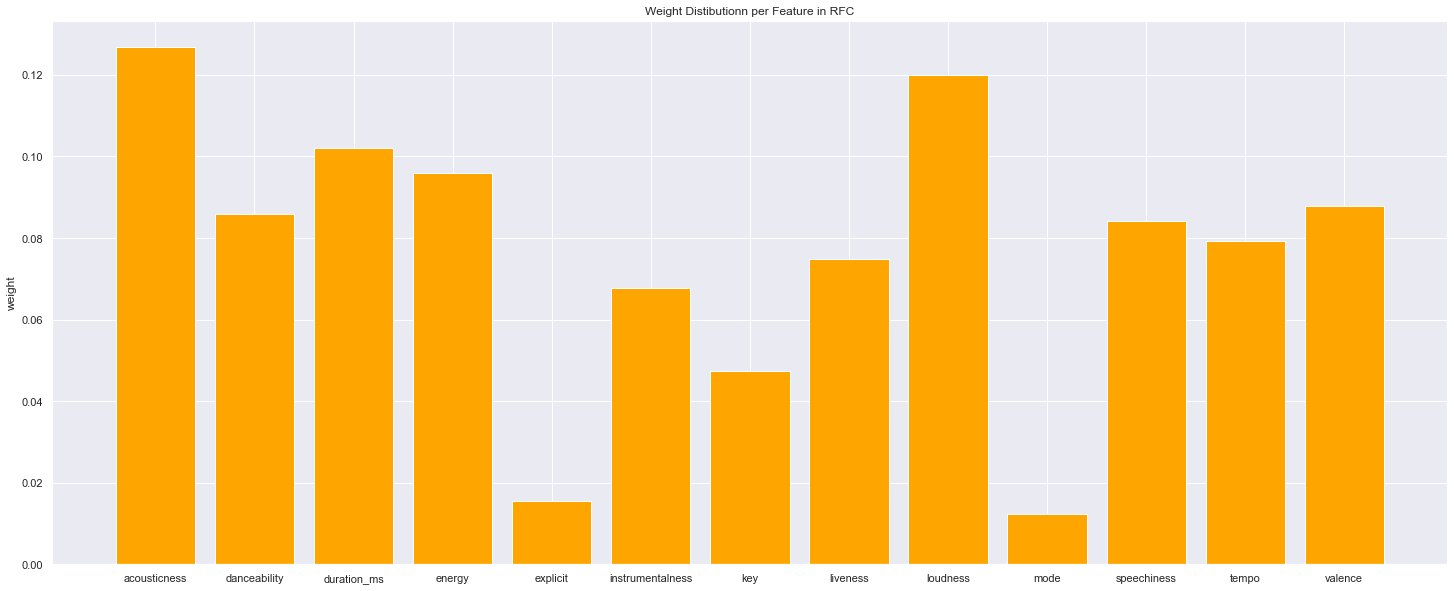

In [39]:
print(true_clf.feature_importances_)

plt.figure(figsize=(25,10))
plt.bar(song_db.columns, true_clf.feature_importances_, color="orange")
#plt.xticks(var_value.index,var_value.index.values)
plt.ylabel("weight")
plt.title("Weight Distibutionn per Feature in RFC")
plt.show()
#print("{}:\n{}".format(variable,var_value))

In [38]:
estimator = clf.estimators_[3]

In [47]:
from sklearn.tree import export_graphviz
# Export as dot file
tree_data = export_graphviz(estimator, out_file='tree.dot', 
                feature_names = song_db.columns,
                class_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [51]:
# Convert to png using system command (requires Graphviz)



<class 'graphviz.sources.Source'>


AttributeError: 'NoneType' object has no attribute 'splitlines'